In [110]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [112]:
train = pd.read_csv('https://raw.githubusercontent.com/scotthungerford01/PS4HouseDataExercise/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/scotthungerford01/PS4HouseDataExercise/master/test.csv')
train.shape
train.head()
# predict the price of the house. The price is the target variable. The other variables are the features or the independent variables.
# 1. ETL    Extract, Transform, Load    (data cleaning)
# 2. Calculate the correlation between the features and the target
# 3. Select the features that are highly correlated with the target
# 4. Build Predictive Model (linear regression)
# 5. Assess Model
# 6. Deploy Model







,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

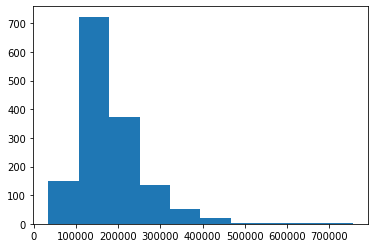

In [114]:
# plot hist
plt.hist(train['SalePrice'])

In [115]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [116]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [117]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,548,856,856,2,8,2003
1,6,1262,2,460,1262,1262,2,6,1976
2,7,1786,2,608,920,920,2,6,2001
3,7,1717,3,642,756,961,1,7,1915
4,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999
1456,6,2073,2,500,1542,2073,2,7,1978
1457,7,2340,1,252,1152,1188,2,9,1941
1458,5,1078,1,240,1078,1078,1,5,1950


In [118]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [119]:
# How good is the model
model.score(X,Y)


0.770302545034713

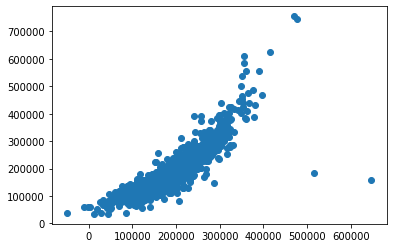

In [120]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [121]:
X_test = test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,3,944,2,528,0,944,1,4,1952
1,5,691,1,216,691,691,1,4,1920
2,8,1574,3,824,1574,1574,2,7,2006
3,5,1680,2,528,1680,1680,2,8,1976
4,7,1504,2,457,1346,1504,2,7,2005
...,...,...,...,...,...,...,...,...,...
455,6,1647,2,460,953,953,2,7,1999
456,6,2073,2,500,1542,2073,2,7,1978
457,7,2340,1,252,1152,1188,2,9,1941
458,5,1078,1,240,1078,1078,1,5,1950


In [132]:
from google.colab import files
test_prediction = model.predict(X_test)
pred_list = test_prediction.tolist()
table = {'Id': test.Id, 'SalePrice': pred_list}

test_df = pd.DataFrame(table)
test_df.to_csv("predictions.csv", index=False)
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>